# **Data Processing**

#### Importing Necessary Libraries for Data Processing and Visualization

In [1]:
# Import the csv module for reading and writing CSV files
import csv

# Import the json module for reading and writing JSON files
import json

# Import pandas for data manipulation and analysis (e.g., working with dataframes)
import pandas as pd

# Import seaborn for statistical data visualization (e.g., creating plots)
import seaborn as sns

# Import matplotlib for creating static, animated, and interactive visualizations (e.g., for customizing plots)
import matplotlib.pyplot as plt


## **Task 1: Read in the provided ACW Data using the CSV library**

In [2]:
# Define a function to read the ACW file
def read_csv_file(given_csv_file):
    """
    Reads the CSV file and returns the headers and data rows.
    param given_csv_file: Path to the CSV file.
    return: A tuple containing headers and rows of data.
    """
    
    # Open the given CSV file in read mode ('r')
    with open(given_csv_file, mode='r') as raw_data:
        # Initialize a CSV reader to read the file with comma delimiter
        csv_reader = csv.reader(raw_data, delimiter=',')
        
        # Initialize an empty list to hold user data (rows of the CSV)
        user_data = []

        # Iterate through each row in the CSV file
        for row_index, row in enumerate(csv_reader):
            # If it's the first row (headers)
            if row_index == 0:
                # Normalize headers to lowercase for consistency and ease of use
                headers = [header.lower() for header in row]
            else:
                # Add the data rows (not headers) to the user_data list
                user_data.append(row)
    
    # Return the headers and data rows as a tuple
    return headers, user_data

# Define the path to the CSV file you want to read
given_csv_file = "acw_user_data.csv"

## **Task 2: Convert flat structures into nested structures**

In [3]:
def convert_to_nested_structure(headers, user_data):
    """
    Converts flat CSV data into a nested dictionary structure.
    param headers: List of column headers from the CSV file.
    param user_data: List of data rows from the CSV file.
    return: A list of structured customer records.
    """
    # Initialize an empty list to hold the structured customer records
    structured_user_data = []

    try:
        # Iterate through each row in the user_data list
        for row in user_data:
            # Check if row has the correct number of columns
            if len(row) != len(headers):
                raise ValueError(f"Row has an incorrect number of columns: {row}")

            # Create a dictionary for the current row using headers as keys
            row_dict = {headers[col_index]: row[col_index] for col_index in range(len(headers))}

            # Process the nested structures with error handling for missing data
            try:
                # Process the vehicle information from the row
                vehicle = {
                    'make': row_dict['vehicle make'] if 'vehicle make' in row_dict else 'Unknown',
                    'model': row_dict['vehicle model'] if 'vehicle model' in row_dict else 'Unknown',
                    'year': int(row_dict['vehicle year']) if 'vehicle year' in row_dict else 0,
                    'type': row_dict['vehicle type'] if 'vehicle type' in row_dict else 'Unknown'
                }
            except Exception as e:
                raise ValueError(f"Error processing vehicle data: {e}")

            try:
                # Process the credit card information from the row
                credit_card = {
                    'start_date': row_dict['credit card start date'] if 'credit card start date' in row_dict else 'N/A',
                    'end_date': row_dict['credit card expiry date'] if 'credit card expiry date' in row_dict else 'N/A',
                    'number': row_dict['credit card number'] if 'credit card number' in row_dict else 'N/A',
                    'security_code': row_dict['credit card cvv'] if 'credit card cvv' in row_dict else 'N/A',
                    'IBAN': row_dict['bank iban'] if 'bank iban' in row_dict else 'N/A'
                }
            except Exception as e:
                raise ValueError(f"Error processing credit card data: {e}")

            try:
                # Process the address information from the row
                address = {
                    'street_address': row_dict['address street'] if 'address street' in row_dict else 'Unknown',
                    'city': row_dict['address city'] if 'address city' in row_dict else 'Unknown',
                    'postcode': row_dict['address postcode'] if 'address postcode' in row_dict else 'Unknown'
                }
            except Exception as e:
                raise ValueError(f"Error processing address data: {e}")

            # Create the complete customer record by combining all the structured data
            try:
                customer = {
                    'first_name': row_dict['first name'] if 'first name' in row_dict else 'Unknown',
                    'last_name': row_dict['last name'] if 'last name' in row_dict else 'Unknown',
                    'age': int(row_dict['age (years)']) if 'age (years)' in row_dict else 0,
                    'sex': row_dict['sex'] if 'sex' in row_dict else 'Unknown',
                    'retired': row_dict['retired'] if 'retired' in row_dict else 'Unknown',
                    'marital_status': row_dict['marital status'] if 'marital status' in row_dict else 'Unknown',
                    'dependants': handle_dependents(row_dict['dependants']) if 'dependants' in row_dict else 0,  # Handle dependents data
                    'salary': int(row_dict['yearly salary (dollar)']) if 'yearly salary (dollar)' in row_dict else 0,
                    'pension': int(row_dict['yearly pension (dollar)']) if 'yearly pension (dollar)' in row_dict else 0,
                    'company': row_dict['employer company'] if 'employer company' in row_dict else 'Unknown',
                    'commute_distance': float(row_dict['distance commuted to work (km)']) if 'distance commuted to work (km)' in row_dict else 0.0,
                    'vehicle': vehicle,
                    'credit_card': credit_card,
                    'address': address
                }
            except Exception as e:
                raise ValueError(f"Error processing customer data: {e}")

            # Append the structured customer record to the list
            structured_user_data.append(customer)

    except Exception as e:
        print(f"An error occurred during conversion: {e}")

    # Return the final list of structured customer records
    return structured_user_data


#### **Handling Dependants Data**

In [4]:
def handle_dependents(dependants_value):
    """
    Attempts to convert the dependents column to an integer.
    If conversion fails, it returns None to indicate a problematic row.
    param dependants_value: The value from the dependents column.
    return: Integer value or None if invalid.
    """
    try:
        return int(dependants_value)
    except ValueError:
        return None

## **Task 3: Handle errors in the dependants column**

In [5]:
def log_problematic_dependants_from_task2(given_csv_file):
    """
    Calls Task 2's functionality to process data and logs problematic rows for dependants.
    param given_csv_file: Path to the CSV file.
    return: A list of problematic row indices and the corrected structured data.
    """
    headers, user_data = read_csv_file(given_csv_file)

    problematic_rows = []  # List to track problematic row indices

    # Find the index of the 'dependants' column in the headers
    dependants_index = headers.index('dependants')

    for row_index, row in enumerate(user_data):
        dependants_value = row[dependants_index]  # Directly access the 'dependants' column value

        # Check for explicitly empty values (" " or "") and correct them
        if dependants_value == " " or dependants_value == "":
            problematic_rows.append(row_index + 1)  # Add 1 to make the index 1-based
            row[dependants_index] = 0  # Replace empty values with 0

    # Call Task 2's convert_to_nested_structure for further processing
    structured_data = convert_to_nested_structure(headers, user_data)

    print("Problematic rows for dependants:", problematic_rows)
    return problematic_rows, structured_data


problematic_rows, corrected_data = log_problematic_dependants_from_task2(given_csv_file)


Problematic rows for dependants: [22, 110, 180, 206, 271, 273, 275, 359, 461, 469, 580, 637, 680, 726, 823, 866, 918, 932, 984]


## **Task 4: Write all records to a processed.json file**

#### Writing Processed Data to a JSON File

In [6]:
def write_records_to_processed_json_file(data, output_file):
    """
    Writes a list of dictionaries to a JSON file.
    param data: The list of dictionaries, where each dictionary represents a person.
    param output_file1: The file path to write the JSON data to.
    """
    try:
        with open(output_file1, mode='w') as json_file_processed:
            json.dump(data, json_file_processed)  # Write data to the output_file
        print(f"Data successfully written to {output_file}")
    except Exception as e:
        print(f"An error occurred while writing to the JSON file: {e}")

output_file1 = "processed.json"  # Desired output file path
write_records_to_processed_json_file(corrected_data, output_file1)

Data successfully written to processed.json


## **Task 5: Create retired.json and employed.json**

#### Filtering and Writing Retired and Employed Customers to Separate Files

In [7]:
def write_filtered_customers_to_files(data, retired_file, employed_file):
    """
    Filters retired and employed customers and writes them to separate JSON files.
    :param data: The structured list of dictionaries containing customer records.
    :param retired_file: File path for writing retired customers.
    :param employed_file: File path for writing employed customers.
    """
    # Filter retired customers
    retired_data = [customer for customer in data if customer['retired'] == "True"] 
   
    # Filter employed customers with a valid company
    employed_data = [customer for customer in data if customer['company'] != 'N/A']
   
    try:
        # Write retired customers to retired.json
        with open(retired_file, "w") as json_file_retired:
            json.dump(retired_data, json_file_retired)

        # Write employed customers to employed.json
        with open(employed_file, "w") as json_file_employed:
            json.dump(employed_data, json_file_employed)

        print(f"Data written to {retired_file} and {employed_file} successfully.")
    except Exception as e:
        print(f"An error occurred while writing to the files: {e}")


retired_file = "retired.json"
employed_file = "employed.json"
write_filtered_customers_to_files(corrected_data, retired_file, employed_file)

Data written to retired.json and employed.json successfully.


## **Task 6: Flag customers with credit card issues**

#### Parsing Date in MM/YY Format

In [8]:
def parse_date(date):
    """
    Parses a date in the format MM/YY and returns the month and year as integers.
    Includes error handling for invalid input.
    """
    try:
        # Split the date string by the '/' character
        parts = date.split('/')
        
        # Ensure the split yields exactly two parts
        if len(parts) != 2:
            raise ValueError("Date must be in the format MM/YY.")
        
        # Extract and convert the month and year to integers
        month = int(parts[0])  # First part is the month
        year = int(parts[1])  # Second part is the year
        
        # Validate the month range
        if month < 1 or month > 12:
            raise ValueError("Month must be between 1 and 12.")
        
        # Adjust the year to a full 4-digit format
        if year < 100:  # Assuming all years are from 2000 onwards
            year += 2000
        return month, year
        
    except ValueError as e:
        print(f"Error parsing date '{date}': {e}")
        return None, None
        
    except Exception as e:
        print(f"Unexpected error while parsing date '{date}': {e}")
        return None, None


In [9]:
def calculate_date_difference(start_date, expiry_date):
    """
    Calculates the difference in years and months between two dates formatted as MM/YY.
    Includes error handling for invalid date inputs.
    """
    try:
        # Parse the start and end dates into month and year components
        start_month, start_year = parse_date(start_date)
        expiry_month, expiry_year = parse_date(expiry_date)
        
        # Ensure dates were parsed successfully
        if None in (start_month, start_year, expiry_month, expiry_year):
            raise ValueError("Invalid date(s) provided.")
        
        # Calculate the difference in years and months
        year_diff = expiry_year - start_year
        month_diff = expiry_month - start_month
        
        # Adjust if month_diff is negative
        if month_diff < 0:
            year_diff -= 1  # Borrow 1 year
            month_diff += 12  # Add 12 months to the difference
        
        # Return the total difference in years as a decimal (including fractional months)
        return year_diff + (month_diff / 12)
    except ValueError as e:
        print(f"Error calculating date difference: {e}")
        return None
    except Exception as e:
        print(f"Unexpected error while calculating date difference: {e}")
        return None

In [10]:
def should_flag_credit_card(row):
    """
    Flags credit card entries if the difference between start and end dates exceeds 10 years.
    Includes error handling for invalid row data.
    """
    try:
        # Get the start and end dates from the row dictionary
        start_date = row["credit_card"]["start_date"]
        expiry_date = row["credit_card"]["end_date"]
        
        # Calculate the difference in years
        years_difference = calculate_date_difference(start_date, expiry_date)
        
        # Ensure date difference calculation was successful
        if years_difference is None:
            raise ValueError("Failed to calculate date difference.")
        
        # Return True if the difference is greater than 10 years, otherwise False
        return years_difference > 10
    except KeyError as e:
        print(f"Missing key in row data: {e}")
        return False
    except ValueError as e:
        print(f"Error determining if credit card should be flagged: {e}")
        return False
    except Exception as e:
        print(f"Unexpected error while flagging credit card: {e}")
        return False

In [11]:
def flag_and_write_credit_cards(data2, output_file):
    """
    Flags credit card entries exceeding 10 years and writes the flagged customers to a JSON file.
    :param data: List of customer dictionaries.
    :param output_file: The file path for writing flagged customer data.
    """
    try:
        # Filter flagged customers
        flagged_credit_cards = [customer for customer in data2 if should_flag_credit_card(customer)]

        # Write flagged customers to the specified JSON file
        with open(output_file2, "w") as json_file_remove:
            json.dump(flagged_credit_cards, json_file_remove)
        print(f"Output saved to {output_file} successfully.")
        
    except Exception as e:
        print(f"Unexpected error during execution: {e}")
    
output_file2 = "remove_ccard.json"
flag_and_write_credit_cards(corrected_data, output_file2)

Output saved to remove_ccard.json successfully.


## **Task 7: Calculate Salary-Commute metric and sort**

#### Calculating and Sorting Salary-Commute Data

In [12]:
def calculate_and_sort_salary_commute(input_file, output_file3):
    """
    Reads data from a JSON file, calculates the 'Salary-Commute' attribute,
    sorts the data manually using nested loops, and writes the sorted data to another JSON file.
    param input_file: Path to the input JSON file (processed.json).
    param output_file3: Path to the output JSON file (e.g., commute.json).
    """
    try:
        # Load the processed data from the input file
        with open(input_file, "r") as json_file_processed:
            user_data_processed = json.load(json_file_processed)

        # Calculate the Salary-Commute attribute
        for customer in user_data_processed:
            # Access the commute distance and salary
            commute_distance = customer["commute_distance"] if "commute_distance" in customer else 0
            salary = customer["salary"] if "salary" in customer else 0

            # Calculate salary-commute metric
            if commute_distance <= 1:  # If commute distance is 1 km or less
                customer["Salary-Commute"] = salary
            else:
                customer["Salary-Commute"] = salary / commute_distance

        # Perform manual sorting based on the "Salary-Commute" attribute in ascending order
        for i in range(len(user_data_processed)):
            for j in range(i + 1, len(user_data_processed)):
                if user_data_processed[i]["Salary-Commute"] > user_data_processed[j]["Salary-Commute"]:
                    # Swap the two records
                    user_data_processed[i], user_data_processed[j] = user_data_processed[j], user_data_processed[i]

        # Save the sorted data to the output file
        with open(output_file3, "w") as json_file_commute:
            json.dump(user_data_processed, json_file_commute)

        print(f"Output saved to {output_file3} successfully.")

    except FileNotFoundError:
        print(f"Error: The file '{input_file}' was not found.")
    except json.JSONDecodeError:
        print(f"Error: Failed to decode JSON from the file '{input_file}'.")
    except Exception as e:
        print(f"Unexpected error during execution: {e}")


input_file = "processed.json" 
output_file3 = "commute.json"
calculate_and_sort_salary_commute(input_file, output_file3)


Output saved to commute.json successfully.


# **Data Visualisation**

## **Task 1: Data Analysis Using Pandas and Seaborn**

In [13]:
# Read the CSV file
df = pd.read_csv("acw_user_data.csv")

# Print the column names to verify
print(df.columns)

#Obtaining the Data Series for Salary and Age
salary_series = df['Yearly Salary (Dollar)']
age_series = df['Age (Years)']

Index(['Address Street', 'Address City', 'Address Postcode', 'Age (Years)',
       'Distance Commuted to Work (Km)', 'Employer Company',
       'Credit Card Start Date', 'Credit Card Expiry Date',
       'Credit Card Number', 'Credit Card CVV', 'Dependants', 'First Name',
       'Bank IBAN', 'Last Name', 'Marital Status', 'Yearly Pension (Dollar)',
       'Retired', 'Yearly Salary (Dollar)', 'Sex', 'Vehicle Make',
       'Vehicle Model', 'Vehicle Year', 'Vehicle Type'],
      dtype='object')


### Task 1a

##### Calculating Mean Salary

In [14]:
mean_salary = salary_series.mean()

print(f"Mean Salary: {mean_salary}")

Mean Salary: 57814.078


### Task 1b

###### Calculating Median Age

In [15]:
median_age = age_series.median()

print(f"Median Age: {median_age}")

Median Age: 54.0


## **Task 2: Univariate Plots of Data Attributes**

### Task 2a

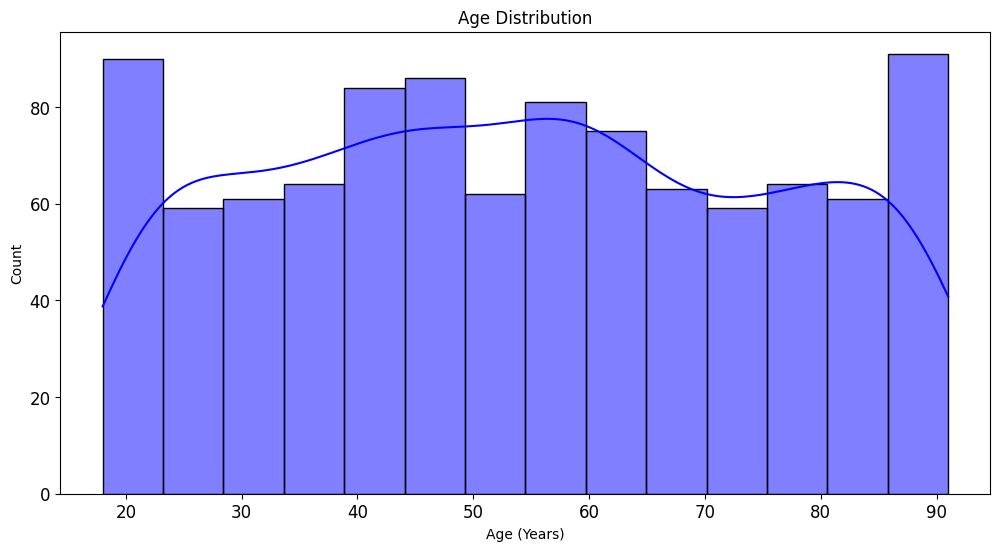

In [16]:
# Calculate the range of the 'age_series' to determine the number of bins for the histogram
age_range = age_series.max() - age_series.min()

# Calculate the number of bins needed with a bin width of 5
num_bins = int(age_range / 5)  # bin_width of 5

# Create a new figure for the plot with a larger size for better readability
plt.figure(figsize=(12, 6))

# Create the histogram with the calculated number of bins and KDE for smoothness
age_plot = sns.histplot(df, x=age_series, bins=num_bins, kde=True, color='blue')

# Set the title and labels for the plot
age_plot.set(title='Age Distribution', xlabel='Age (Years)', ylabel='Count')

# Adjust the font size for both x and y axis ticks for better clarity
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display the plot
plt.show()

### Task 2b

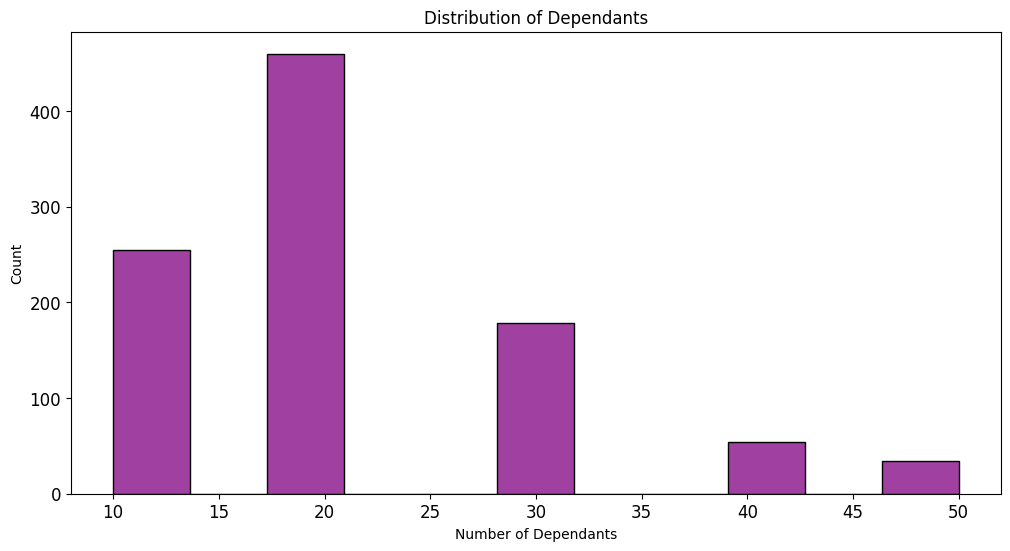

In [17]:
# Function to clean the 'Dependants' column by extracting numeric values and removing non-numeric ones
def clean_dependants(x):
    if pd.isna(x):
        return x
    return float(''.join(filter(str.isdigit, str(x))))

# Apply the cleaning function to the 'Dependants' column to remove non-numeric values
df['Dependants'] = df['Dependants'].apply(clean_dependants)

# Create a univariate plot for the 'Dependants' column to visualize the distribution
plt.figure(figsize=(12, 6))
dependants_plot = sns.histplot(df, x='Dependants', color='purple')
dependants_plot.set(title='Distribution of Dependants', xlabel='Number of Dependants', ylabel='Count')

# Customize the font size of the ticks for better readability
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display the plot
plt.show()

### Task 2c

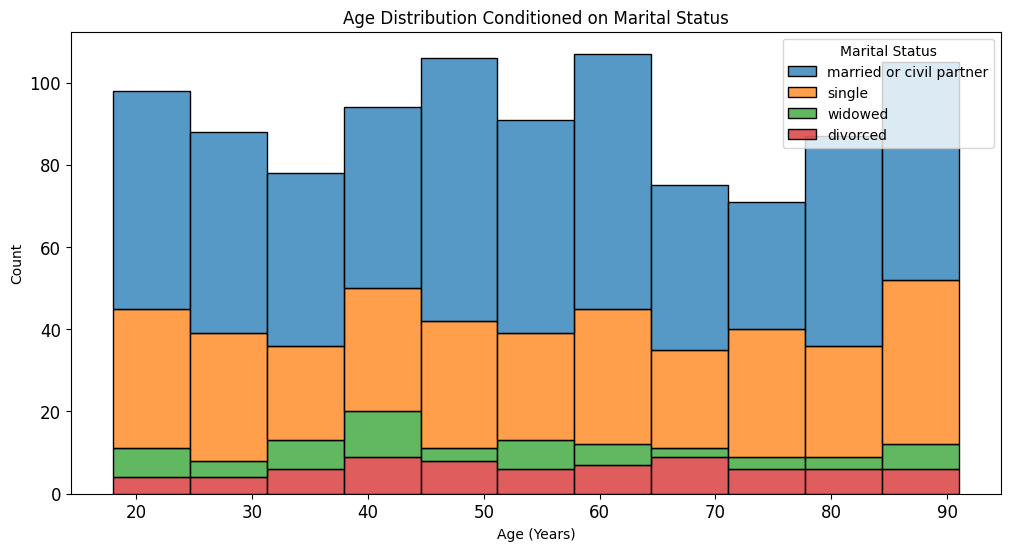

In [18]:
# Create a stacked histogram to visualize the distribution of 'Age' conditioned on 'Marital Status'
plt.figure(figsize=(12, 6))

# Plot the age distribution, separating by marital status using 'hue' and stacking the bars
age_marital_plot = sns.histplot(data=df, x=age_series, hue='Marital Status', multiple='stack')

# Set the title and labels for the plot
age_marital_plot.set(title='Age Distribution Conditioned on Marital Status', xlabel='Age (Years)', ylabel='Count')

# Adjust the font size of the x and y axis ticks for better readability
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display the plot
plt.show()

## Task 3: **Multivariate Plots of Data Attributes**

### Task 3a

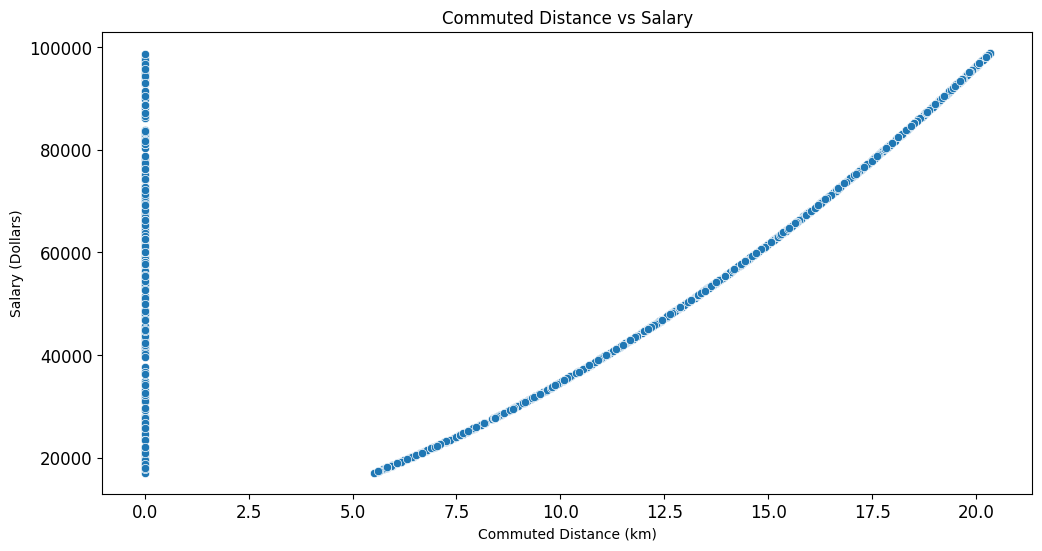

In [19]:
# Create a scatter plot to visualize the relationship between commuted distance and salary
plt.figure(figsize=(12, 6))

# Plot the scatter plot with 'Distance Commuted to Work (Km)' on the x-axis and 'Yearly Salary (Dollar)' on the y-axis
commuted_distance_vs_salary_plot = sns.scatterplot(data=df, x='Distance Commuted to Work (Km)', y='Yearly Salary (Dollar)')

# Set the title and labels for the plot
commuted_distance_vs_salary_plot.set(title='Commuted Distance vs Salary', xlabel='Commuted Distance (km)', ylabel='Salary (Dollars)')

# Adjust the font size of the x and y axis ticks for better readability
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display the plot
plt.show()

### Task 3b

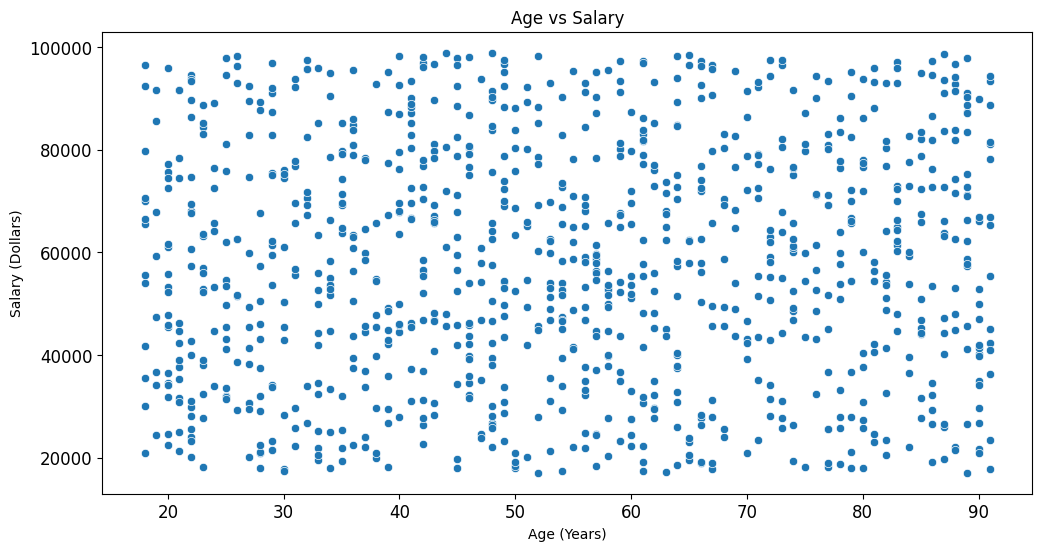

In [20]:
# Create a scatter plot to visualize the relationship between age and salary
plt.figure(figsize=(12, 6))

# Plot the scatter plot with 'Age (Years)' on the x-axis and 'Yearly Salary (Dollar)' on the y-axis
age_vs_salary_plot = sns.scatterplot(data=df, x='Age (Years)', y='Yearly Salary (Dollar)')

# Set the title and labels for the plot
age_vs_salary_plot.set(title='Age vs Salary', xlabel='Age (Years)', ylabel='Salary (Dollars)')

# Adjust the font size of the x and y axis ticks for better readability
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display the plot
plt.show()


### Task 3c

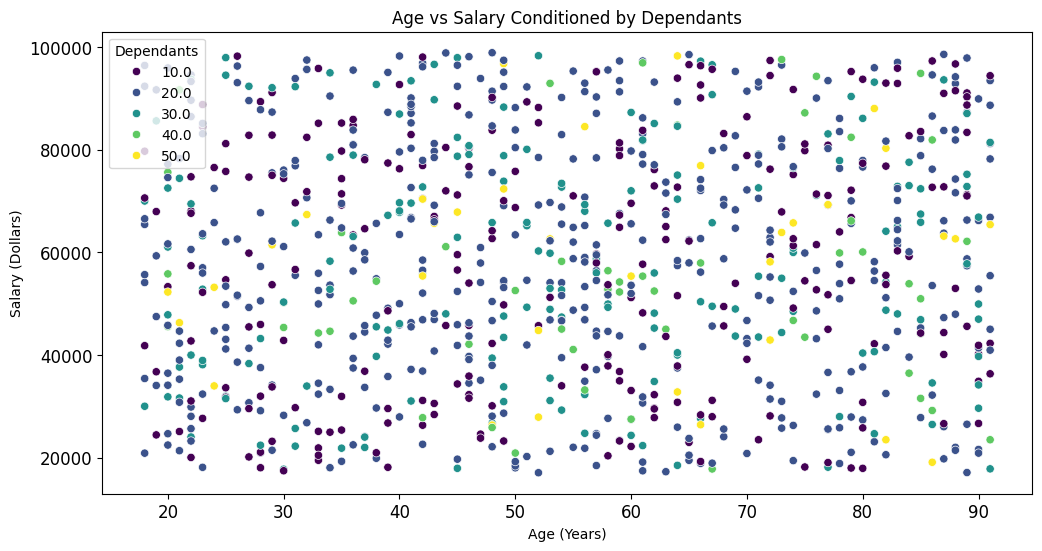

In [21]:
# Create a scatter plot to visualize the relationship between age and salary, conditioned by the number of dependants
plt.figure(figsize=(12, 6))

# Plot the scatter plot with 'Age (Years)' on the x-axis, 'Yearly Salary (Dollar)' on the y-axis,
# and color the points by 'Dependants' using the 'viridis' color palette
age_vs_salary_con_dependants_plot = sns.scatterplot(data=df, x='Age (Years)', y='Yearly Salary (Dollar)', hue='Dependants', palette='viridis')

# Set the title and labels for the plot
age_vs_salary_con_dependants_plot.set(title='Age vs Salary Conditioned by Dependants', xlabel='Age (Years)', ylabel='Salary (Dollars)')

# Adjust the font size of the x and y axis ticks for better readability
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display the plot
plt.show()

## **Task 4: Implemented plot saving functionality in the notebook.**


In [22]:
# Create a dictionary to store the file paths and corresponding plot objects
figures_to_save = {}
figures_to_save["./age_plot.png"] = age_plot  # Save the age plot
figures_to_save["./dependants_plot.png"] = dependants_plot  # Save the dependants plot
figures_to_save["./age_marital_plot.png"] = age_marital_plot  # Save the age vs marital status plot
figures_to_save["./commuted_distance_vs_salary_plot.png"] = commuted_distance_vs_salary_plot  # Save the commuted distance vs salary plot
figures_to_save["./age_vs_salary_plot.png"] = age_vs_salary_plot  # Save the age vs salary plot
figures_to_save["./age_vs_salary_con_dependants_plot.png"] = age_vs_salary_con_dependants_plot  # Save the age vs salary conditioned by dependants plot

# Loop through the dictionary and save each plot to its respective file path
for file_path, fig in figures_to_save.items():
    fig.figure.savefig(file_path)  # Save the figure to the specified path

print("Pictures saved successfully")  # Confirm that the plots have been saved


Pictures saved successfully
